## 1. 딥러닝 코드 복습

### MLP를 사용한 이미지 분류

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm import tqdm

In [12]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print("Using PyTorch version:", torch.__version__,' Device:', DEVICE)

BATCH_SIZE = 128

Using PyTorch version: 2.6.0+cu124  Device: cuda


In [13]:
import torchvision

In [14]:
from torchvision import transforms, datasets
train_dataset = datasets.MNIST(root = "./data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "./data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

In [15]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type()) #batch size, channel ,img_w, omg_h
    print('y_train:', y_train.size(), 'type:', y_train.type()) # batch
    break

X_train: torch.Size([128, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([128]) type: torch.LongTensor


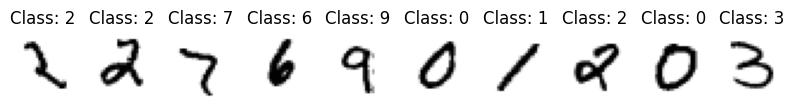

In [16]:
plt.figure(figsize=(10 , 1)) #10개 plot하기 위한 figure 크기 설정

for i in range(10):
    plt.subplot(1, 10, i + 1) # plot.subplot(rows, columns, index)
    plt.axis('off')
    plt.imshow(X_train[i].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10) # class의 개수 #binary classification --> 1

    def forward(self,x):
        # x --> 128, 1, 28, 28 --> 128, 1*28*28
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.fc3(x)
        return x

In [18]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss() # 10개 분류

In [19]:
def train(model, train_loader, optimizer):
    model.train()
    train_loss = 0
    for batch_idx, (image, label) in tqdm(enumerate(train_loader)):
        image = image.to(DEVICE)
        label = label.to(DEVICE)

        optimizer.zero_grad()

        output = model(image)
        loss = criterion(output, label)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    return train_loss / (len(train_loader.dataset) / BATCH_SIZE)


In [20]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()

    test_loss /= (len(test_loader.dataset)/ BATCH_SIZE)
    return test_loss

In [21]:
EPOCHS = 20
for epoch in range(1, EPOCHS + 1):
    train_loss = train(model, train_loader, optimizer)
    test_loss = evaluate(model, test_loader)
    print(f"[EPOCH: {epoch}], \tTrain Loss: {train_loss:.3f}, \tTest Loss: {test_loss:.3f}")

469it [00:06, 68.98it/s]


[EPOCH: 1], 	Train Loss: 1.608, 	Test Loss: 0.695


469it [00:06, 68.42it/s]


[EPOCH: 2], 	Train Loss: 0.517, 	Test Loss: 0.400


469it [00:06, 76.25it/s]


[EPOCH: 3], 	Train Loss: 0.378, 	Test Loss: 0.333


469it [00:06, 70.44it/s]


[EPOCH: 4], 	Train Loss: 0.330, 	Test Loss: 0.301


469it [00:06, 69.93it/s]


[EPOCH: 5], 	Train Loss: 0.300, 	Test Loss: 0.276


469it [00:06, 77.18it/s]


[EPOCH: 6], 	Train Loss: 0.278, 	Test Loss: 0.260


469it [00:06, 70.05it/s]


[EPOCH: 7], 	Train Loss: 0.259, 	Test Loss: 0.241


469it [00:06, 77.01it/s]


[EPOCH: 8], 	Train Loss: 0.242, 	Test Loss: 0.227


469it [00:06, 71.97it/s]


[EPOCH: 9], 	Train Loss: 0.227, 	Test Loss: 0.217


469it [00:06, 68.65it/s]


[EPOCH: 10], 	Train Loss: 0.213, 	Test Loss: 0.202


469it [00:06, 74.93it/s]


[EPOCH: 11], 	Train Loss: 0.201, 	Test Loss: 0.191


469it [00:06, 69.46it/s]


[EPOCH: 12], 	Train Loss: 0.190, 	Test Loss: 0.183


469it [00:06, 74.34it/s]


[EPOCH: 13], 	Train Loss: 0.180, 	Test Loss: 0.172


469it [00:05, 78.24it/s]


[EPOCH: 14], 	Train Loss: 0.170, 	Test Loss: 0.166


469it [00:06, 70.39it/s]


[EPOCH: 15], 	Train Loss: 0.162, 	Test Loss: 0.157


469it [00:06, 77.89it/s]


[EPOCH: 16], 	Train Loss: 0.154, 	Test Loss: 0.151


469it [00:06, 71.64it/s]


[EPOCH: 17], 	Train Loss: 0.146, 	Test Loss: 0.145


469it [00:06, 71.73it/s]


[EPOCH: 18], 	Train Loss: 0.140, 	Test Loss: 0.138


469it [00:06, 76.13it/s]


[EPOCH: 19], 	Train Loss: 0.133, 	Test Loss: 0.137


469it [00:06, 69.74it/s]


[EPOCH: 20], 	Train Loss: 0.127, 	Test Loss: 0.129


In [22]:
for image, label in test_loader:
    output = model(image.to(DEVICE)).cpu()
    # output shape --> batch, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] --> 가장 확률이 높은 index
y_pred = torch.argmax(output, dim = 1) # dim 0 --> batch , dim 1--> 숫자 별 확률
print(y_pred)
print(label)

tensor([1, 2, 8, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])


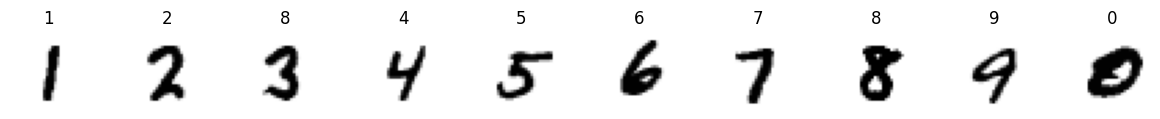

In [23]:
plt.figure(figsize=(15 , 1)) #10개 plot하기 위한 figure 크기 설정

for i in range(10):
    plt.subplot(1, 10, i + 1) # plot.subplot(rows, columns, index)
    plt.axis('off')
    plt.imshow(image[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title(str(y_pred[i].item()))

In [24]:
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()

## 2. 오토인코더

오토인코더는 입력 데이터를 다시 재구성하는 모델입니다.      
즉, 주어진 데이터를 압축해서 잠재 공간(latent space)에 표현한 후, 이를 다시 원래의 데이터로 복원하는 과정을 거칩니다.


오토인코더는 일반적으로 두 개의 중요한 부분으로 나뉩니다

- 인코더(Encoder): 입력 데이터를 작은 차원의 잠재 공간으로 압축합니다.
- 디코더(Decoder): 잠재 공간에서 압축된 데이터를 다시 원래 차원으로 복원합니다.

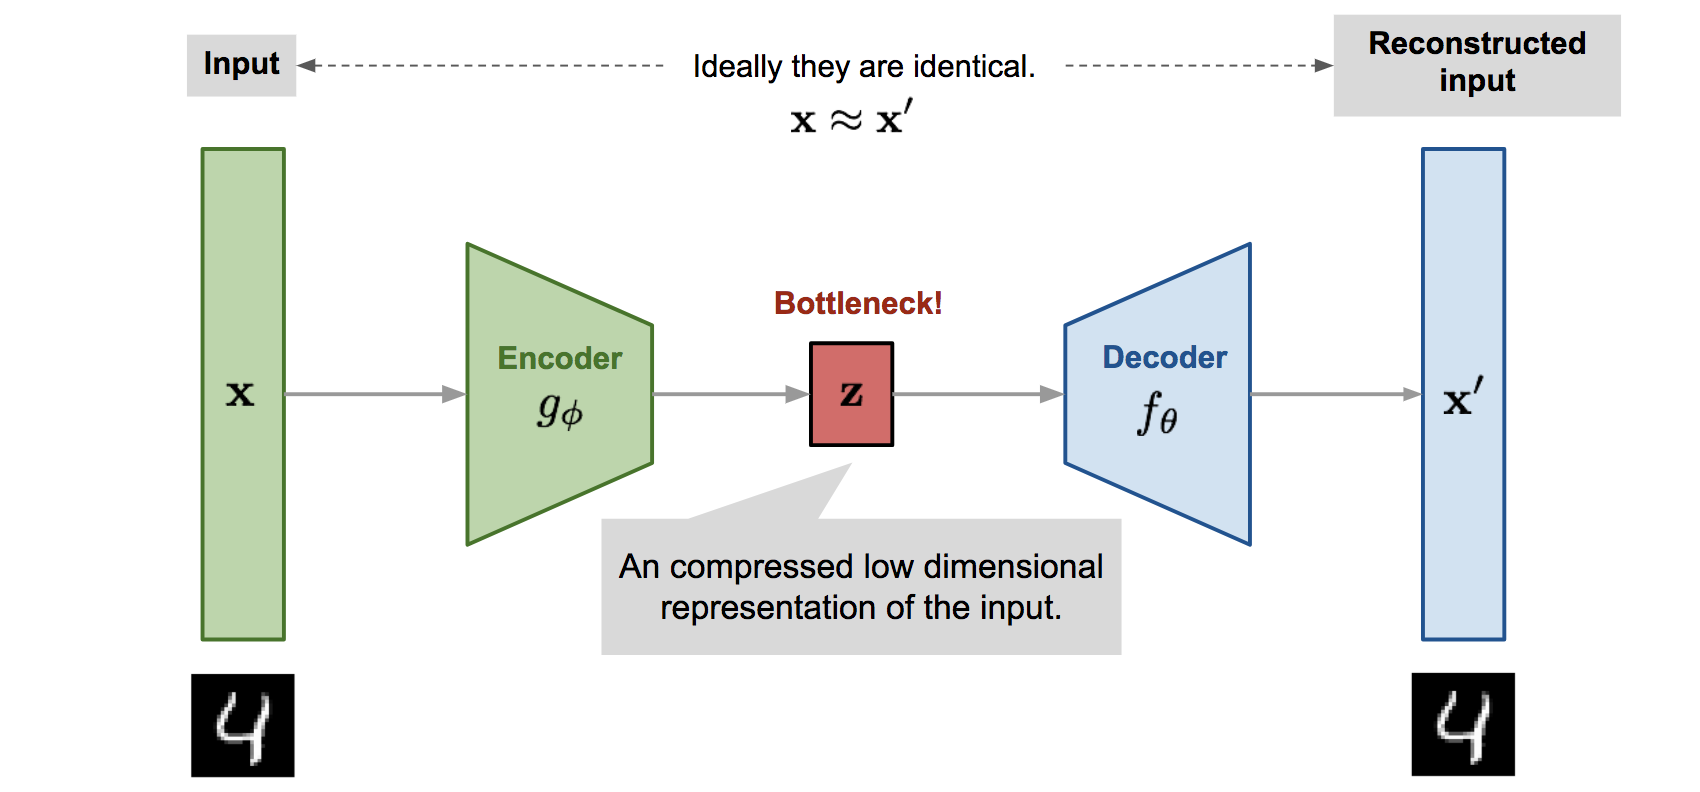

오토인코더의 주요 목적은 데이터의 중요한 특징을 학습하는 것입니다.     
이 과정에서 복잡한 데이터를 단순화하거나, 불필요한 잡음(noise)을 제거하는 역할을 합니다.     
이를 통해 데이터의 중요한 패턴만을 학습할 수 있습니다.

추천 동영상 : 오토인더의 모든 것 by Naver D2 (https://www.youtube.com/watch?v=o_peo6U7IRM)

__오토인코더의 활용__
1. __차원 축소__: 고차원의 데이터를 저차원으로 압축하여 시각화하거나 분석할 때 사용됩니다.    
예를 들어, 수천 개의 특징을 가진 데이터를 몇 개의 중요한 특징만으로 압축할 수 있습니다.  
1. __노이즈 제거__ (DAE): 이미지나 텍스트의 잡음을 제거하는 데 유용합니다.     
잡음이 포함된 데이터를 입력하면, 오토인코더가 원래의 깨끗한 데이터를 복원하려고 학습합니다.
1. __데이터 생성__ (VAE): 변형된 오토인코더(VAE, 변분 오토인코더) 같은 방식으로 새로운 데이터를 생성할 수 있습니다.      
예를 들어, 새로운 이미지나 텍스트를 생성하는 데 활용됩니다.

In [25]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28*28, 512),
                                    nn.ReLU(),
                                    nn.Linear(512, 128),
                                    nn.ReLU(),
                                    nn.Linear(128, latent_dim))

        self.decoder = nn.Sequential(nn.Linear(latent_dim, 128),
                                    nn.ReLU(),
                                    nn.Linear(128, 512),
                                    nn.ReLU(),
                                    nn.Linear(512, 28*28))

    def forward(self, x):
        x_flat = x.view(-1, 28*28)
        z = self.encoder(x_flat)
        x_flat = self.decoder(z) # 평평하게 편 것
        return x_flat.view(x.shape) # 이미지 모양으로 네모나게 접어야 한다.

In [26]:
ae = AutoEncoder(2)
print(ae)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [27]:
# frobenius_norm = sum(torch.norm(param, p='fro') for param in model.parameters())
i = 0
for param in ae.parameters():
    print(torch.norm(param).item())
    i += 1

13.069408416748047
0.4832135736942291
6.53057336807251
0.2883911430835724
0.8021358251571655
0.044050589203834534
6.6635661125183105
4.705009460449219
13.043646812438965
1.2053183317184448
16.164724349975586
0.7048425078392029


In [36]:
def train(model, train_loader, criterion, optimizer):
    model.train()
    train_loss = 0
    loss_history = []
    norm_history = []

    for image, _ in tqdm(train_loader):
        image = image.to(DEVICE)
        # label = label.to(DEVICE)
        optimizer.zero_grad()

        output = model(image)

        mse_loss = criterion(output, image) # 비지도 학습
        norm = sum(torch.norm(param, p='fro') for param in model.parameters())
        loss_history.append(mse_loss.item())
        ratio = 0.0005
        # norm_history.append(ratio*norm.item())

        loss = mse_loss + ratio*norm
        loss.backward()
        optimizer.step()

        train_loss += loss.item()


    return train_loss / (len(train_loader.dataset) / BATCH_SIZE) , loss_history, norm_history

In [29]:
ae = AutoEncoder(2).to(DEVICE)
optimizer = torch.optim.Adam(ae.parameters(), lr=0.005)
criterion = nn.MSELoss()
EPOCHS = 10
mse_hist = []
# nm_hist = []

for epoch in range(1, EPOCHS + 1):
    train_loss, mse_per_epoch = train(ae, train_loader, criterion, optimizer)
    # train_loss, mse_per_epoch, nm_per_epoch = train(model, train_loader, criterion, optimizer)
    mse_hist += mse_per_epoch
    # nm_hist += nm_per_epoch
    print(f"[EPOCH: {epoch}], \tTrain Loss: {train_loss:.3f}")

100%|██████████| 469/469 [00:07<00:00, 63.18it/s]


[EPOCH: 1], 	Train Loss: 0.066


100%|██████████| 469/469 [00:07<00:00, 62.61it/s]


[EPOCH: 2], 	Train Loss: 0.060


100%|██████████| 469/469 [00:07<00:00, 64.73it/s]


[EPOCH: 3], 	Train Loss: 0.059


100%|██████████| 469/469 [00:07<00:00, 64.08it/s]


[EPOCH: 4], 	Train Loss: 0.059


100%|██████████| 469/469 [00:07<00:00, 62.30it/s]


[EPOCH: 5], 	Train Loss: 0.059


100%|██████████| 469/469 [00:06<00:00, 67.53it/s]


[EPOCH: 6], 	Train Loss: 0.059


100%|██████████| 469/469 [00:07<00:00, 61.74it/s]


[EPOCH: 7], 	Train Loss: 0.059


100%|██████████| 469/469 [00:07<00:00, 61.39it/s]


[EPOCH: 8], 	Train Loss: 0.059


100%|██████████| 469/469 [00:07<00:00, 66.06it/s]


[EPOCH: 9], 	Train Loss: 0.059


100%|██████████| 469/469 [00:07<00:00, 61.47it/s]

[EPOCH: 10], 	Train Loss: 0.059


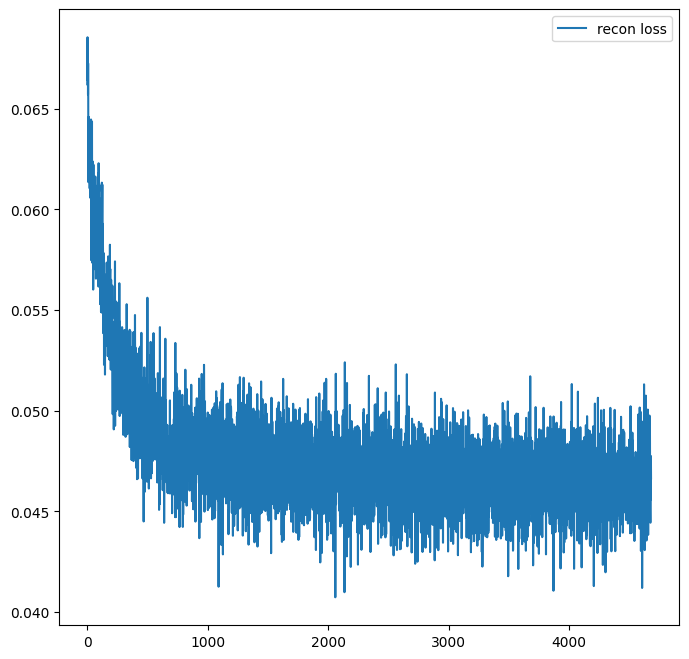

In [30]:
plt.figure(figsize=(8, 8))
plt.plot(mse_hist[10:], '-', label = 'recon loss')
# plt.plot(nm_hist[10:], '-', label = 'reg loss')
plt.legend()
plt.show()

100%|██████████| 469/469 [00:07<00:00, 64.49it/s]


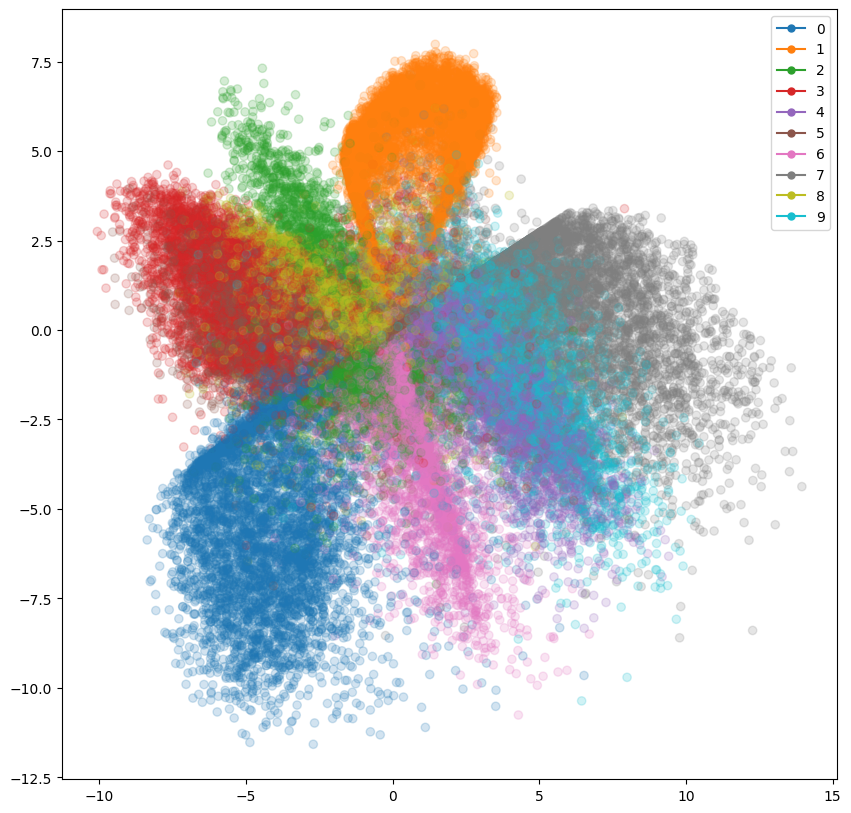

In [31]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color=f'C{c}', label=f'{c}',
                    markerfacecolor=f'C{c}', markersize=5) for c in range(10)]

ae.eval()

fig, ax = plt.subplots(figsize=(10, 10))
for batch_idx, (image, label) in enumerate(tqdm(train_loader)):
    latent = ae.encoder(image.view(-1, 28*28).to(DEVICE)).cpu().detach().numpy()
    label_cmap = [f'C{l}' for l in label]
    ax.scatter(latent[:, 0], latent[:, 1], c = label_cmap, alpha = 0.2)

plt.legend(handles = legend_elements)
plt.show()

#### 연습해보기, 생각해보기
- 모델의 활성화함수, 옵티마이저, 레이어 구조, 드롭아웃, 목적 함수 등을 바꿔가면서 latent space의 변화를 확인해보세요
- autoencoder는 비지도 함수, 즉 label이 학습에 사용되지 않았습니다. 그런데 어째서 latent space에서는 구분되어 있을까요?
- 위에 보이는 latent space의 특징은 뭔가요? 왜 이렇게 되었을까요?
- norm을 추가해 봅시다. 어떻게 바뀌나요? 그리고 norm의 비율을 키워봅시다.
- 인코더와 디코더를 fc가 아니라 cnn으로 바꿔봅시다.

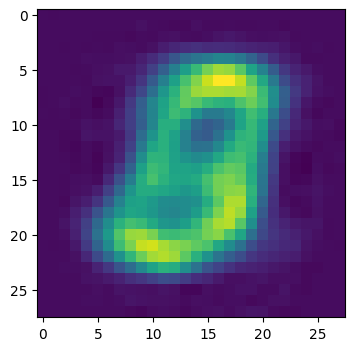

In [32]:
out = ae.decoder(torch.tensor([[-2.5, -1]], dtype=torch.float32).to(DEVICE)).cpu().detach().numpy()
plt.figure(figsize = (4, 4))
plt.imshow(out.reshape(28, 28))
plt.show()

In [33]:
lim = 2
x = np.linspace(-lim, lim, 10)  # x축 범위와 분할
y = np.linspace(-lim, lim, 10)  # y축 범위와 분할
X, Y = np.meshgrid(x, y)      # 2차원 그리드 생성

# 그리드 포인트 출력
points = np.vstack([X.ravel(), Y.ravel()]).T

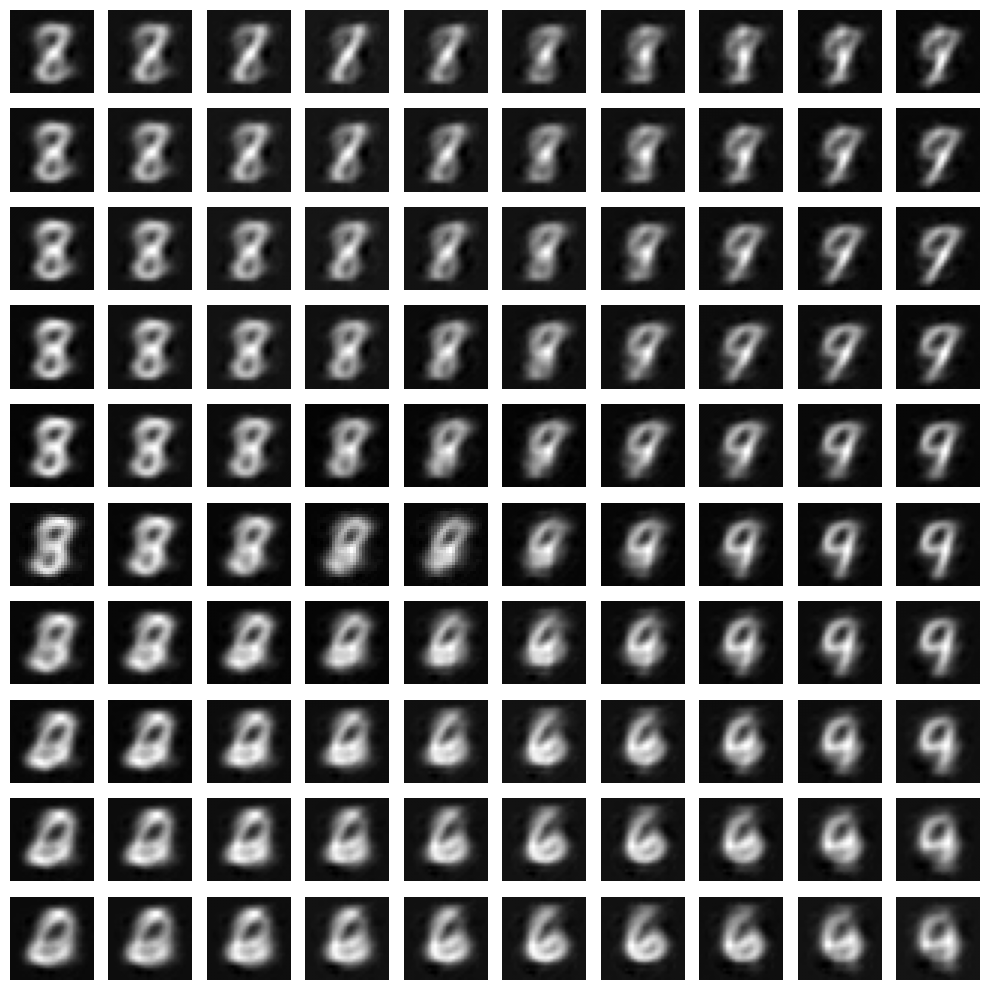

In [34]:
num = 10
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
x = np.linspace(-lim, lim, 10)  # x축 범위와 분할
y = np.linspace(-lim, lim, 10)  # y축 범위와 분할

# 2차원 이미지로 예제 그리기
for i in range(num):
    for j in range(num):
        point = [x[i], y[j]]
        out = ae.decoder(torch.tensor(point, dtype=torch.float32).to(DEVICE))
        out = out.cpu().detach().numpy().reshape(28, 28)
        axes[num - j - 1, i].imshow(out, cmap='gray')
        axes[num - j - 1, i].axis('off')  # 축 숨기기

plt.tight_layout()
plt.show()

latent space를 2차원으로 지정한 건 단지 시각적으로 표현하기 위해서입니다.     
z가 작으면 전체 데이터를 압축하는 과정에서 너무 많은 정보가 손실됩니다.    
적절한 z의 dim을 정하는 것이 중요한데 2차원보다 큰 고차원의 latent space에서는 어떻게 될까요?

In [37]:
try :
    del model
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
except:
    pass

model = AutoEncoder(16).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()
EPOCHS = 15
mse_hist = []
nm_hist = []

for epoch in range(1, EPOCHS + 1):
    train_loss, mse_per_epoch, nm_per_epoch = train(model, train_loader, criterion, optimizer)
    mse_hist += mse_per_epoch
    nm_hist += nm_per_epoch
    print(f"[EPOCH: {epoch}], \tTrain Loss: {train_loss:.3f}")

100%|██████████| 469/469 [00:07<00:00, 61.40it/s]


[EPOCH: 1], 	Train Loss: 0.058


100%|██████████| 469/469 [00:06<00:00, 67.31it/s]


[EPOCH: 2], 	Train Loss: 0.047


100%|██████████| 469/469 [00:07<00:00, 60.90it/s]


[EPOCH: 3], 	Train Loss: 0.045


100%|██████████| 469/469 [00:07<00:00, 61.65it/s]


[EPOCH: 4], 	Train Loss: 0.044


100%|██████████| 469/469 [00:07<00:00, 66.63it/s]


[EPOCH: 5], 	Train Loss: 0.044


100%|██████████| 469/469 [00:07<00:00, 61.00it/s]


[EPOCH: 6], 	Train Loss: 0.044


100%|██████████| 469/469 [00:06<00:00, 67.15it/s]


[EPOCH: 7], 	Train Loss: 0.044


100%|██████████| 469/469 [00:07<00:00, 61.53it/s]


[EPOCH: 8], 	Train Loss: 0.044


100%|██████████| 469/469 [00:07<00:00, 61.61it/s]


[EPOCH: 9], 	Train Loss: 0.044


100%|██████████| 469/469 [00:07<00:00, 66.13it/s]


[EPOCH: 10], 	Train Loss: 0.043


100%|██████████| 469/469 [00:07<00:00, 60.84it/s]


[EPOCH: 11], 	Train Loss: 0.043


100%|██████████| 469/469 [00:07<00:00, 62.78it/s]


[EPOCH: 12], 	Train Loss: 0.043


100%|██████████| 469/469 [00:07<00:00, 64.16it/s]


[EPOCH: 13], 	Train Loss: 0.043


100%|██████████| 469/469 [00:07<00:00, 60.77it/s]


[EPOCH: 14], 	Train Loss: 0.043


100%|██████████| 469/469 [00:07<00:00, 65.99it/s]

[EPOCH: 15], 	Train Loss: 0.042


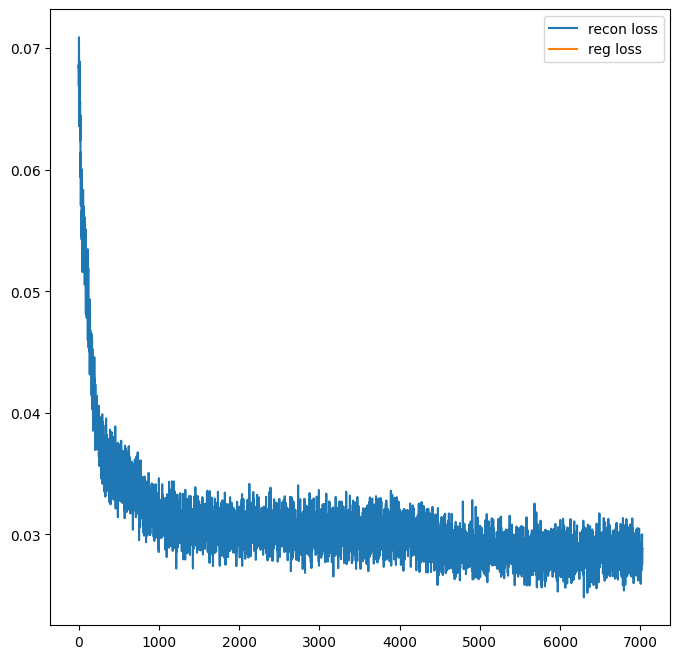

In [38]:
plt.figure(figsize=(8, 8))
plt.plot(mse_hist[10:], '-', label = 'recon loss')
plt.plot(nm_hist[10:], '-', label = 'reg loss')
plt.legend()
plt.show()

In [39]:
latents = []
labels = []

model.eval()
with torch.no_grad():
    for batch, label in tqdm(train_loader):
        latent = model.encoder(batch.view(-1, 28*28).to(DEVICE))
        latents.append(latent.cpu().numpy())
        labels.append(label.cpu().numpy())

latents = np.concatenate(latents, axis=0)
labels = np.concatenate(labels, axis=0)
print(latents.shape)


100%|██████████| 469/469 [00:06<00:00, 74.99it/s]

(60000, 16)


In [40]:
import numpy
numpy.__version__

'2.0.2'

In [41]:
!pip install umap-learn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


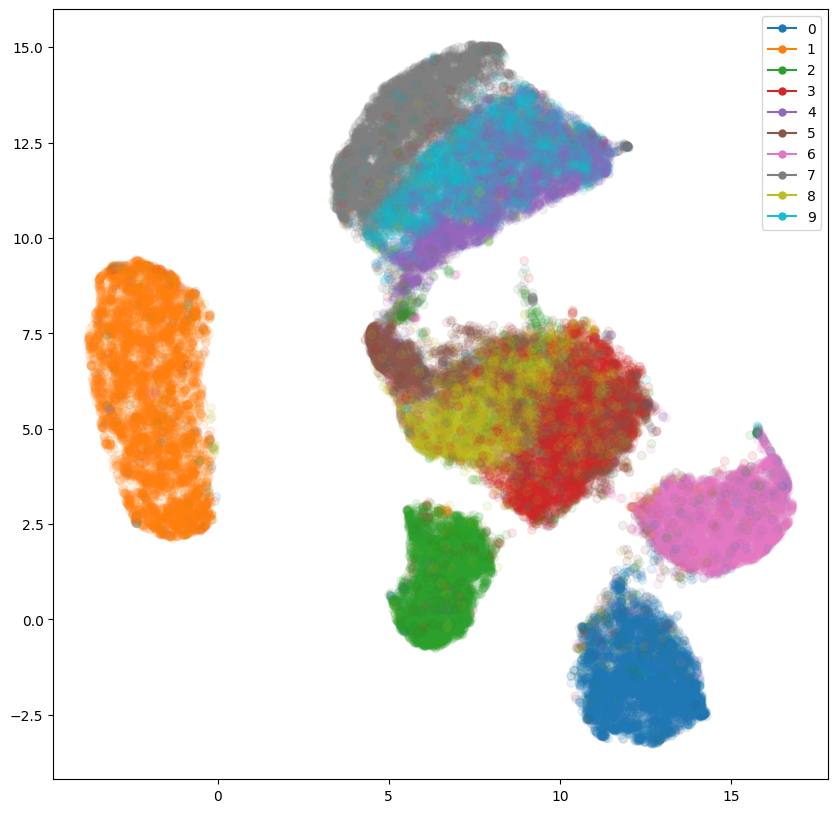

In [42]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(latents)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color=f'C{c}', label=f'{c}',
                    markerfacecolor=f'C{c}', markersize=5) for c in range(10)]

fig, ax = plt.subplots(figsize=(10, 10))
label_cmap = [f'C{l}' for l in labels]
ax.scatter(embedding[:, 0], embedding[:, 1], c = label_cmap, alpha = 0.1)

plt.legend(handles = legend_elements)
plt.show()